<a href="https://colab.research.google.com/github/andresgalrod21/quadratic-discriminant-analysis/blob/DavidRomero/quadratic_discriminant_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quadratic Discriminant Analysis

      User_ID  Age  Gender  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0  USER-00001   23  Female                    6.57                      6.00   
1  USER-00002   21    Male                    3.01                      2.57   
2  USER-00003   51    Male                    3.04                      6.14   
3  USER-00004   25  Female                    3.84                      4.48   
4  USER-00005   53    Male                    1.20                      0.56   

   Gaming_Hours  Screen_Time_Hours Mental_Health_Status Stress_Level  \
0          0.68              12.36                 Good          Low   
1          3.74               7.61                 Poor         High   
2          1.26               3.16                 Fair         High   
3          2.59              13.08            Excellent       Medium   
4          0.29              12.63                 Good          Low   

   Sleep_Hours  Physical_Activity_Hours Support_Systems_Access  \
0         8.01      

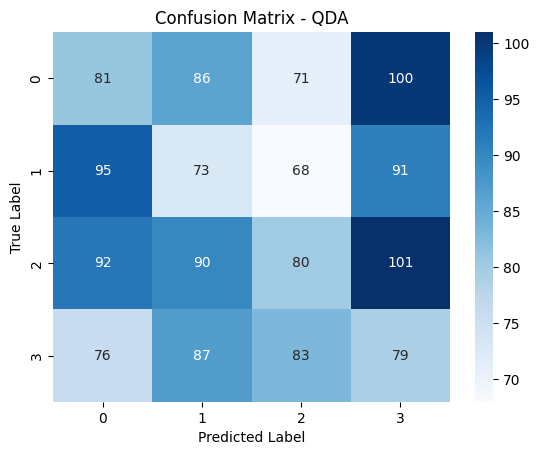

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Cargar el dataset
data = pd.read_csv('mental_health_and_technology_usage_2024.csv')

# Exploración inicial de los datos
print(data.head())
print(data.info())
print(data.describe())

# Eliminación de la columna 'User_ID'
data = data.drop(columns=['User_ID'])
print("----------------------------------------------------------------")
print(data.isnull().sum())  # Verificar valores nulos

# Codificación de la columna 'Gender'
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Opción 1: Predicción del estado de salud mental
X_mental_health = data.drop(columns=['Mental_Health_Status'])  # Características
y_mental_health = data['Mental_Health_Status']  # Variable objetivo

# Identificar columnas con datos no numéricos
categorical_cols = X_mental_health.select_dtypes(include=['object']).columns

# Convertir las columnas categóricas a numéricas usando LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    X_mental_health[col] = label_encoder.fit_transform(X_mental_health[col])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_mental_health, y_mental_health, test_size=0.2, random_state=42)

# Eliminar las filas con valores nulos
X_train = pd.DataFrame(X_train).dropna()
X_test = pd.DataFrame(X_test).dropna()

y_train = y_train.loc[X_train.index]  # Asegurarse de que las etiquetas coincidan con las filas restantes
y_test = y_test.loc[X_test.index]

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento del modelo de Análisis Discriminante Cuadrático (QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predicción con el modelo
y_pred = qda.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Graficar la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - QDA")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()






# Sección nueva